In [2]:
import pandas as pd
import numpy as np
schema={
'公告日期':str,
'证券代码':str,
'证券简称':str,
'减持日期':str,
'股东名称':str,
'减持数量':int,
'减持比例':float,
'减持价格':str
}
df=pd.read_excel("减持明细.xlsx",sheet_name='Sheet1',dtype=schema, na_values=['',' '])
df['减持价格最低']=df['减持价格'].str.split('-').str[0].astype(float)
df['减持价格最高']=df['减持价格'].str.split('-').str[1].astype(float)
df=df.drop(['减持价格'],axis=1)
df.query('证券代码=="000408"')

,公告日期,证券代码,证券简称,减持日期,股东名称,减持数量(股),减持比例(%),减持价格最低,减持价格最高
223,2022-08-29,000408,藏格矿业,2022-08-10,西藏藏格创业投资集团有限公司,500000,0.032,31.57,NaN
225,2022-12-06,000408,藏格矿业,2022-07-31,西藏藏格创业投资集团有限公司,11028572,0.698,33.95,38.43
226,2022-12-06,000408,藏格矿业,2022-06-30,西藏藏格创业投资集团有限公司,3749807,0.237,32.14,33.77


In [3]:
#filter筛选结果是index名(axis=1)或者columns名(axis=0)
df_group=df.groupby(['公告日期','证券代码']).size().reset_index(name='count')
df_group

# df_group.rename(columns={'公告日期':'date','证券代码':'count'})
# df_group.plot(x='公告日期',y='证券代码')

,公告日期,证券代码,count
0,2022-05-16,300071,1
1,2022-05-16,300119,1
2,2022-05-16,300221,5
3,2022-05-16,300334,3
4,2022-05-16,300399,1
...,...,...,...
6551,2023-07-07,603367,8
6552,2023-07-07,603567,4
6553,2023-07-07,603895,2
6554,2023-07-07,603926,2


In [4]:
df1=df[(df["证券简称"]=="拓新药业") & (df["股东名称"]=="北京新华联产业投资有限公司")]
#外单引号内双引号
other_df=df.query('证券简称=="拓新药业" and 股东名称=="北京新华联产业投资有限公司"')
other_df
# # df2=df1[['公告日期','证券简称','减持数量(股)']]
# df2

,公告日期,证券代码,证券简称,减持日期,股东名称,减持数量(股),减持比例(%),减持价格最低,减持价格最高
14355,2023-02-27,301089,拓新药业,2022-11-06,北京新华联产业投资有限公司,867400,0.688,NaN,NaN
14357,2023-02-27,301089,拓新药业,2022-11-18,北京新华联产业投资有限公司,937000,0.744,NaN,NaN
14358,2022-11-29,301089,拓新药业,2022-11-25,北京新华联产业投资有限公司,500000,0.397,85.78,NaN
14359,2022-11-29,301089,拓新药业,2022-11-28,北京新华联产业投资有限公司,686903,0.545,84.66,NaN
14361,2022-11-30,301089,拓新药业,2022-11-29,北京新华联产业投资有限公司,73098,0.058,83.84,NaN
14377,2023-02-27,301089,拓新药业,2022-12-14,北京新华联产业投资有限公司,625599,0.497,NaN,NaN
14387,2023-05-15,301089,拓新药业,2023-03-03,北京新华联产业投资有限公司,450000,0.357,68.64,NaN
14389,2023-03-22,301089,拓新药业,2023-03-21,北京新华联产业投资有限公司,200000,0.159,NaN,NaN
14392,2023-03-29,301089,拓新药业,2023-03-28,北京新华联产业投资有限公司,1060000,0.841,56.28,NaN
14395,2023-04-27,301089,拓新药业,2023-04-26,北京新华联产业投资有限公司,361200,0.287,NaN,NaN


In [17]:
df3=df.groupby([df['证券代码'],df['证券简称']]).size().reset_index(name='count')
df3.head()

,证券代码,证券简称,count
0,000004,国华网安,2
1,000009,中国宝安,4
2,000021,深科技,2
3,000025,特 力Ａ,5
4,000026,飞亚达,5


In [18]:
#显示全部数据位数，不以十进制e显示
pd.set_option('display.float_format', lambda x: f'{x:.3f}')
df4=df.groupby([df['证券代码'],df['证券简称']])['减持数量(股)'].agg('mean').reset_index(name='平均减持数量')
# .rename(columns={'证券代码':'证券号码','证券简称':'证券名称','减持数量(股)':'平均减持数量'})
df4.head(20)

,证券代码,证券简称,平均减持数量
0,000004,国华网安,867700.000
1,000009,中国宝安,5230350.000
2,000021,深科技,5963532.000
3,000025,特 力Ａ,1141826.000
4,000026,飞亚达,38500.000
5,000029,深深房Ａ,1964352.600
6,000034,神州数码,1210562.500
7,000035,中国天楹,6124285.714
8,000036,华联控股,727066.000
9,000038,大通退,2965900.000


In [22]:
df5=pd.merge(df3,df4,how='inner',on=['证券代码','证券简称'])

df5.head(20)

,证券代码,证券简称,count,平均减持数量
0,000004,国华网安,2,867700.000
1,000009,中国宝安,4,5230350.000
2,000021,深科技,2,5963532.000
3,000025,特 力Ａ,5,1141826.000
4,000026,飞亚达,5,38500.000
5,000029,深深房Ａ,5,1964352.600
6,000034,神州数码,22,1210562.500
7,000035,中国天楹,7,6124285.714
8,000036,华联控股,3,727066.000
9,000038,大通退,1,2965900.000


In [23]:
#join 就是把两个DF索引相同的行连接在一起
person=pd.DataFrame([{'name':'Tom','age':18,'birth':'2005-05-01'},{'name':'Jimmy','age':17,'birth':'2006-05-01'}])
queue=pd.DataFrame([{'class':'A','number':1},{'class':'A','number':2}])
merged=pd.merge(person,queue,left_index=True,right_index=True)
merged.head()

,name,age,birth,class,number
0,Tom,18,2005-05-01,A,1
1,Jimmy,17,2006-05-01,A,2


In [24]:
import findspark
findspark.init()
findspark.find()


from pyspark.sql import SparkSession
from pyspark.sql import DataFrame
import pyspark.sql.functions as f
from pyspark.sql.types import StructType, StructField, StringType, IntegerType, DecimalType, FloatType


spark_session = SparkSession.builder \
    .master("local") \
    .config("spark.jars.packages","io.delta:delta-core_2.12:2.1.0") \
    .config("spark.sql.extensions", "io.delta.sql.DeltaSparkSessionExtension") \
    .config("spark.sql.catalog.spark_catalog", "org.apache.spark.sql.delta.catalog.DeltaCatalog") \
    .getOrCreate()

schema=StructType([
    StructField('公告日期',StringType(),True),
    StructField('证券代码',StringType(),True),
    StructField('证券简称',StringType(),True),
    StructField('减持日期',StringType(),True),
    StructField('股东名称',StringType(),True),
    StructField('减持数量',IntegerType(),True),
    StructField('减持比例',DecimalType(10,2),True),
    StructField('减持价格',FloatType(),True)
])

spark=spark_session.builder.getOrCreate()
df=spark.read.format('csv').option("header", "true").schema(schema).load('减持明细*.csv')
df.printSchema()

root
 |-- 公告日期: string (nullable = true)
 |-- 证券代码: string (nullable = true)
 |-- 证券简称: string (nullable = true)
 |-- 减持日期: string (nullable = true)
 |-- 股东名称: string (nullable = true)
 |-- 减持数量: integer (nullable = true)
 |-- 减持比例: decimal(10,2) (nullable = true)
 |-- 减持价格: float (nullable = true)



In [25]:
df_time=spark.sql("""select date_format(cast('2024-01-01 15:01:01' as timestamp),'yyyyMM')""")
df_time.show()

+-----------------------------------------------------------+
|date_format(CAST(2024-01-01 15:01:01 AS TIMESTAMP), yyyyMM)|
+-----------------------------------------------------------+
|                                                     202401|
+-----------------------------------------------------------+



In [26]:
df.count()

19290

In [29]:
from pyspark.sql.functions import col
df1=df.where((df['证券简称']=='拓新药业') & (df['股东名称']=="北京新华联产业投资有限公司"))
df2=df1['公告日期','证券简称','减持数量']
df3=df2.withColumnRenamed('公告日期','date').withColumnRenamed('证券简称','name')
df3.select('name','date')
df3.filter(col('name')=='拓新药业')
df3.where(col('name')=='拓新药业')
df3.where("name='拓新药业'").show()

+----------+--------+--------+
|      date|    name|减持数量|
+----------+--------+--------+
| 2/27/2023|拓新药业|  867400|
| 2/27/2023|拓新药业|  937000|
|11/29/2022|拓新药业|  500000|
|11/29/2022|拓新药业|  686903|
|11/30/2022|拓新药业|   73098|
| 2/27/2023|拓新药业|  625599|
| 5/15/2023|拓新药业|  450000|
| 3/22/2023|拓新药业|  200000|
| 3/29/2023|拓新药业| 1060000|
| 4/27/2023|拓新药业|  361200|
| 5/15/2023|拓新药业|  311100|
| 6/28/2023|拓新药业| 1260000|
+----------+--------+--------+



In [33]:
df3=df.withColumnRenamed('证券简称','simple_name').withColumnRenamed('股东名称','shareholder_name')
#where使用SQL子句，链接关键词大写，column_name必须是中文
df4=df3.where("simple_name=='拓新药业' AND shareholder_name=='北京新华联产业投资有限公司'")
df5=df4['公告日期','simple_name','减持数量']
df5.show()

+----------+-----------+--------+
|  公告日期|simple_name|减持数量|
+----------+-----------+--------+
| 2/27/2023|   拓新药业|  867400|
| 2/27/2023|   拓新药业|  937000|
|11/29/2022|   拓新药业|  500000|
|11/29/2022|   拓新药业|  686903|
|11/30/2022|   拓新药业|   73098|
| 2/27/2023|   拓新药业|  625599|
| 5/15/2023|   拓新药业|  450000|
| 3/22/2023|   拓新药业|  200000|
| 3/29/2023|   拓新药业| 1060000|
| 4/27/2023|   拓新药业|  361200|
| 5/15/2023|   拓新药业|  311100|
| 6/28/2023|   拓新药业| 1260000|
+----------+-----------+--------+



In [35]:
df6=df.groupBy([df['证券代码'],df['证券简称']]).agg(f.avg(df['减持数量']).alias('平均减持数量')).orderBy(df['证券代码'])
df6.show()

+--------+--------+--------------------+
|证券代码|证券简称|        平均减持数量|
+--------+--------+--------------------+
|  000004|国华网安|            867700.0|
|  000009|中国宝安|           5230350.0|
|  000021|  深科技|           5963532.0|
|  000025|特  力Ａ|           1141826.0|
|  000026|  飞亚达|             38500.0|
|  000029|深深房Ａ|           1964352.6|
|  000034|神州数码|           1210562.5|
|  000035|中国天楹|   6124285.714285715|
|  000036|华联控股|            727066.0|
|  000038|  大通退|           2965900.0|
|  000042|中洲控股|             13075.0|
|  000045|深纺织Ａ|           1403600.0|
|  000048|京基智农|               1.3E7|
|  000050|深天马Ａ|             10000.0|
|  000056|皇庭国际|  4157152.9411764704|
|  000063|中兴通讯|1.5664933333333334E7|
|  000065|北方国际|           2353800.0|
|  000068|华控赛格|  4034533.3333333335|
|  000078|海王生物|            500000.0|
|  000088|盐 田 港|            249766.4|
+--------+--------+--------------------+
only showing top 20 rows



In [39]:
df7=df.groupBy([df['证券代码'],df['证券简称']]).agg(f.count(df['证券简称']).alias('减持条数')).orderBy(df['证券代码']).withColumnsRenamed({'证券代码':'证券号码','证券简称':'证券名称'})
df7.show()


+--------+--------+--------+
|证券号码|证券名称|减持条数|
+--------+--------+--------+
|  000004|国华网安|       2|
|  000009|中国宝安|       4|
|  000021|  深科技|       2|
|  000025|特  力Ａ|       5|
|  000026|  飞亚达|       5|
|  000029|深深房Ａ|       5|
|  000034|神州数码|      22|
|  000035|中国天楹|       7|
|  000036|华联控股|       3|
|  000038|  大通退|       1|
|  000042|中洲控股|       2|
|  000045|深纺织Ａ|       1|
|  000048|京基智农|       2|
|  000050|深天马Ａ|       1|
|  000056|皇庭国际|      17|
|  000063|中兴通讯|       3|
|  000065|北方国际|       1|
|  000068|华控赛格|       3|
|  000078|海王生物|       1|
|  000088|盐 田 港|       5|
+--------+--------+--------+
only showing top 20 rows



In [40]:
df8=df6.join(df7,how='inner',on=[df6['证券代码']==df7['证券号码'],df6['证券简称']==df7['证券名称']])
# for i in range(0,2):
#      df8=df8.drop(df7.columns[i])
for col in df7.columns[0:2]:
      df8=df8.drop(col)
df8.show()

+--------+--------+------------------+--------+
|证券代码|证券简称|      平均减持数量|减持条数|
+--------+--------+------------------+--------+
|  300337|银邦股份|       6184576.125|       8|
|  300811|铂科新材|          353705.0|      14|
|  300831|派瑞股份| 580846.5833333334|      24|
|  301010|晶雪节能| 771428.5714285715|       7|
|  600089|特变电工|           74700.0|       2|
|  600267|海正药业|         1.18362E7|       2|
|  600340|华夏幸福|      1.43932345E7|      16|
|  603063|禾望电气|1470319.3333333333|       9|
|  603071|物产环能|          700243.7|      10|
|  603267|鸿远电子|         1680000.0|       1|
|  603903|中持股份|          224900.0|       1|
|  605289|罗曼股份|337261.36363636365|      11|
|  000893|亚钾国际|         6372500.0|       4|
|  002344|海宁皮城|          270000.0|       1|
|  002601|龙佰集团|             350.0|       2|
|  300430|  诚益通|         5463000.0|       1|
|  300603|立昂技术|          367259.5|      12|
|  300709|精研科技|          438400.0|       1|
|  603181|皇马科技|3978366.6666666665|       3|
|  603313|  梦百合|         2793700.0|  

In [41]:
#Structs
df = spark.createDataFrame([(14, "Tom"), (23, "Alice"), (16, "Bob")], ["age", "name"])
df.show()
df.crosstab('age','name').show()
#pyspark union和unionAll相同，unionByName使用不同DF同名columnname进行union，都不去重，Pandas使用concat来实现

+---+-----+
|age| name|
+---+-----+
| 14|  Tom|
| 23|Alice|
| 16|  Bob|
+---+-----+

+--------+-----+---+---+
|age_name|Alice|Bob|Tom|
+--------+-----+---+---+
|      16|    0|  1|  0|
|      23|    1|  0|  0|
|      14|    0|  0|  1|
+--------+-----+---+---+



In [21]:
#SQL 锁定部分行累计
sum(number) over(partition by name order by timestamp rows between 1 preceding and current row) as sum_number_w1_row,
-- 前1行_后1行
sum(number) over(partition by name order by timestamp rows between 1 preceding and 1 following) as sum_number_w2_row,
-- 第1行_当前行
sum(number) over(partition by name order by timestamp rows between unbounded preceding and current row) as sum_number_w3_row,
-- 前2行_当前行
sum(number) over(partition by name order by timestamp rows between 2 preceding and current row) as sum_number_w4_row

SyntaxError: invalid syntax (1581133470.py, line 2)

In [47]:

a = spark.createDataFrame([(5,2),(6,3)],"A: int, B: int")
b = spark.createDataFrame([(5,2),(7,4)],"A: int, B: int")
a.exceptAll(b).show()



+---+---+
|  A|  B|
+---+---+
|  6|  3|
+---+---+



In [5]:
import pandas as pd
a = pd.DataFrame({'A':[5,5,6,6],'B':[6,6,4,3]})
b = pd.DataFrame({'A':[5,6,3,2],'B':[6,7,8,9]})
a.compare(b,keep_shape=True)

A          B      
  self other self other
0  NaN   NaN  NaN   NaN
1  5.0   6.0  6.0   7.0
2  6.0   3.0  4.0   8.0
3  6.0   2.0  3.0   9.0

In [6]:
a

,A,B
0,5,6
1,5,6
2,6,4
3,6,3


In [17]:
a.iloc[0]

A    5
B    6
Name: 0, dtype: int64

In [105]:
c=a.query('A==5 and B==6')
c
# a.T

,A,B
0,5,6
1,5,6


In [103]:
a.drop_duplicates(subset=['A'],keep='last')
#a.drop_duplicates(subset=['A','B'])

,A,B
1,5,6
3,6,3


In [73]:
a.columns
a.dtypes

A    int64
B    int64
dtype: object

In [61]:
a.loc

In [63]:
#通过index返回相应整行得数据
a.loc[lambda df:df['A']==5]

,A,B
0,5,6
1,5,2


In [76]:
#reset_index 让结果以新的格式显示，而不是保留旧得格式
agg=a.groupby('A')['B'].sum().reset_index()
agg
#pandas query等于pyspark的where，后面的参数都是可以用string形式传入

,A,B
0,5,12
1,6,7


In [91]:
a.astype('string')

,A,B
0,5,6
1,5,6
2,6,4
3,6,3


In [58]:
import pyspark.sql.functions as f
df=spark.sql("select cast('true' as boolean) as test")
df.select(f.typeof(col('test')).alias('type')).show()

+-------+
|   type|
+-------+
|boolean|
+-------+



In [1]:
list1=[1,2,3,4,5]
list2=[x*10 if x%2!=0 else x for x in list1]
list2

[10, 2, 30, 4, 50]

In [1]:
def welcome(func):
    def wapper(*args,**kwargs):
        print("welcome")
        result=func(*args,**kwargs)
        return result
    return wapper
@welcome
def myfunc(message):
    print(message)

myfunc("test")

welcome
test


In [2]:
# 方法一：使用反斜杠 \ 换行
long_string1 = "这是一个非常长的字符串，我们可以使用反斜杠来换行，\
这样可以使代码更加整洁和可读。"

# 方法二：使用三重引号 """ """
long_string2 = """这是一个非常长的字符串，
我们可以直接在三重引号中换行，
这样可以使代码更加整洁和可读。"""

# 方法三：使用括号 () 包裹多行字符串
long_string3 = (
    "这是一个非常长的字符串，我们可以将其分成多行，"
    "并使用括号包裹，这样每一部分都会自动连接成一个完整的字符串，"
    "这样可以使代码更加整洁和可读。"
)

# 方法四：使用 + 运算符连接多个子串
long_string4 = "这是一个非常长的字符串，" + \
               "我们可以将其分成多行，" + \
               "并使用加号运算符连接，" + \
               "这样可以使代码更加整洁和可读。"

print(long_string1)
print(long_string2)
print(long_string3)
print(long_string4)

这是一个非常长的字符串，我们可以使用反斜杠来换行，这样可以使代码更加整洁和可读。
这是一个非常长的字符串，
我们可以直接在三重引号中换行，
这样可以使代码更加整洁和可读。
这是一个非常长的字符串，我们可以将其分成多行，并使用括号包裹，这样每一部分都会自动连接成一个完整的字符串，这样可以使代码更加整洁和可读。
这是一个非常长的字符串，我们可以将其分成多行，并使用加号运算符连接，这样可以使代码更加整洁和可读。


In [15]:
import textwrap
long_string2 = textwrap.dedent("""
       You are a very helpful assistant. You must answer the questions in 
        ENGLISH or Chinese based on Question language.
        Instructions:
        - All information in your answers if contained in PDF, should get \
from PDF, if not, should get answer from model yourself
        - In case the question cannot be answered using the information \
provided in the PDF, honestly state that you cannot answer that question.
        - Be detailed in your answers but stay focused on the question.\
Add all details that are useful to provide a complete answer, but do not\
add details beyond the scope of the question.
        PDF Context: {context}
        Question: {question}
        Helpful Answer:  """)
print(long_string2)


You are a very helpful assistant. You must answer the questions in 
 ENGLISH or Chinese based on Question language.
 Instructions:
 - All information in your answers if contained in PDF, should get from PDF, if not, should get answer from model yourself
 - In case the question cannot be answered using the information provided in the PDF, honestly state that you cannot answer that question.
 - Be detailed in your answers but stay focused on the question.Add all details that are useful to provide a complete answer, but do notadd details beyond the scope of the question.
 PDF Context: {context}
 Question: {question}
 Helpful Answer:  


In [1]:
with open('text.txt','w') as instance:
    instance.write('Hello!')
print('the end')

the end


In [8]:
import time

class Timer():
    def __init__(self):
        self.elapse=0
    
    def __enter__(self):
        self.start=time.perf_counter()
        return self
    
    def __exit__(self,exc_type,exc_val,exc_tb):
        self.stop=time.perf_counter()
        self.elapse=self.stop-self.start
        
with Timer() as timer:
    nums=[]
    for n in range(10000):
        nums.append(n**2)
        
print(timer.elapse)

0.0023318000603467226


In [10]:
import pandas as pd
df = pd.DataFrame({
    'Year': [2020, 2021, 2020, 2021],
    'Category': ['Fruit', 'Fruit', 'Vegetable', 'Vegetable'],
    'Amount': [50, 60, 30, 40]
})

df_unstacked = df.pivot_table(index='Year', columns='Category', values='Amount', aggfunc='sum').reset_index()
df_unstacked

Category,Year,Fruit,Vegetable
0,2020,50,30
1,2021,60,40


In [22]:
import pandas as pd

df = pd.DataFrame({
    'Date': ['2020-01-01', '2020-01-01', '2020-01-02', '2020-01-02'],
    'Category': ['Fruit', 'Vegetable', 'Fruit', 'Vegetable'],
    'Amount': [50, 30, 60, 40]
})

pivot_table = df.pivot(index='Date', columns='Category', values='Amount').reset_index()
pivot_table

Category,Date,Fruit,Vegetable
0,2020-01-01,50,30
1,2020-01-02,60,40


In [12]:
def gen(num:int):
    while num>0:
        yield num
        num -=1
    return
#只要方法中有yield，方法自动被识别为生成器对象，g为迭代对象，而不是值
g=gen(5)

first = next(g)

for i in g:
    print(i)

4
3
2
1


In [18]:
x=[1,2,3,4,5]
y=[i*10 if i%2==0 else i for i in x]
print(y)

[1, 20, 3, 40, 5]


In [24]:
x=[1,2,3,4,5]
type(i*10 if i%2==0 else i for i in x)

generator

In [29]:
df=pd.DataFrame({'company':['BAIDU','ALI','AQI'],
                 'value':[21.1,32.2,40.4]
                })
df_coding={'baidu':'111','ali':'222','aqi':'333'}
df['coding']=df['company'].str.lower().map(df_coding)
df

,company,value,coding
0,BAIDU,21.1,111
1,ALI,32.2,222
2,AQI,40.4,333


In [31]:
df['coding2']=df['company'].map(lambda x:df_coding[x.lower()])
df

,company,value,coding,coding2
0,BAIDU,21.1,111,111
1,ALI,32.2,222,222
2,AQI,40.4,333,333


In [36]:
df['coding3']=df.apply(lambda x:df_coding[x['company'].lower()],axis=1)
df

,company,value,coding,coding2,coding3
0,BAIDU,21.1,111,111,111
1,ALI,32.2,222,222,222
2,AQI,40.4,333,333,333


In [37]:
value_min=df['value'].min()
value_max=df['value'].max()
df['value_norm']=df['value'].apply(lambda x:(x-value_min)/(value_max-value_min))
df

,company,value,coding,coding2,coding3,value_norm
0,BAIDU,21.1,111,111,111,0.00000
1,ALI,32.2,222,222,222,0.57513
2,AQI,40.4,333,333,333,1.00000


In [42]:
df[df['value']<35]

,company,value,coding,coding2,coding3,value_norm
0,BAIDU,21.1,111,111,111,0.00000
1,ALI,32.2,222,222,222,0.57513


In [3]:
import pytest

@pytest.fixture
def sample_file():
    with open('sample.txt', 'w') as f:
        f.write('Hello, pytest!')
    return 'sample.txt'
    
def test_read_file(sample_file):
    with open(sample_file, 'r') as f:
        content = f.read()
    assert content == 'Hello, pytest!'

pytest

<module 'pytest' from 'C:\\ProgramData\\anaconda3\\Lib\\site-packages\\pytest\\__init__.py'>

In [4]:
class Car:
    def __init__(self, make, model):
        self.make = make
        self.model = model
        self.engine = self.Engine(4)  # 创建内部类的实例

    def display_info(self):
        print(f"Car: {self.make} {self.model}, Engine Cylinders: {self.engine.cylinders}")
    
    class Engine:
        def __init__(self, cylinders):
            self.cylinders = cylinders

# 创建 Car 实例
my_car = Car("Toyota", "Corolla")

# 直接访问 Engine 实例及其属性
print(f"Number of cylinders in the engine: {my_car.engine.cylinders}")

# 使用 Car 类的方法显示信息,这种访问方式是因为在 Car 的构造器中将 Engine 的一个实例作为属性（self.engine）保存在了 Car 实例中，从而允许直接通过 my_car.engine 来访问。
my_car.display_info()

Number of cylinders in the engine: 4
Car: Toyota Corolla, Engine Cylinders: 4


In [14]:
from pydantic import BaseModel, validator, ValidationError
import pandas as pd

class User(BaseModel):
    id: int
    name: str
    age: int
    
    @validator('age')
    def check_age(cls, v):
        if v < 0:
            raise ValueError("Age must be a positive integer")
        return v

data = {
    'id': [1, 2, 3],
    'name': ['Alice', 'Bob', 'Charlie'],
    'age': [25, -10, 30]
}

df = pd.DataFrame(data)

for index, row in df.iterrows():
    try:
        user = User(**row)
    except ValidationError as e:
        print(f"Validation error in row {index}: {e}")

Validation error in row 1: 1 validation error for User
age
  Age must be a positive integer (type=value_error)


In [8]:
import pandera as pa
from pandera import Column, DataFrameSchema
import os

os.environ['PYARROW_IGNORE_TIMEZONE'] = '1'

schema = DataFrameSchema({
    "id": Column(int, checks=pa.Check.ge(0)),  # ID should be a non-negative integer
    "name": Column(str, checks=pa.Check.str_length(min_value=1)),  # Name must be a non-empty string
    "age": Column(int, checks=[
        pa.Check.ge(0),  # Age should be greater than or equal to 0
        pa.Check.le(120)  # Age should be less than or equal to 120
    ])
})

data = {
    "id": [1, 2, 3, -1],  # Note: the last id is negative, should trigger a validation error
    "name": ["Alice", "Bob", "Charlie", ""],  # Note: the last name is empty, should trigger a validation error
    "age": [25, 30, 35, 130]  # Note: the last age is too high, should trigger a validation error
}

df = pd.DataFrame(data)

try:
    # Validates the DataFrame against the schema
    validated_df = schema.validate(df)
    print("Validation passed")
    print(validated_df)
except pa.errors.SchemaError as e:
    print("Validation failed")
    print(e.failure_cases)  # Gives detailed information about which checks failed and why

Validation failed
   index  failure_case
0      3            -1


In [10]:
#Isolation Forest
from sklearn.ensemble import IsolationForest
import numpy as np

# 生成数据
rng = np.random.RandomState(42)
X = 0.3 * rng.randn(100, 2)
X_train = np.r_[X + 2, X - 2]
X_outliers = rng.uniform(low=-4, high=4, size=(20, 2))

# 训练模型
clf = IsolationForest(random_state=rng, contamination=0.1)
clf.fit(X_train)

# 预测
y_pred_train = clf.predict(X_train)
y_pred_outliers = clf.predict(X_outliers)

# 输出异常值
print(X_train)
print("Outlier predictions for the outliers:")
print(y_pred_outliers)

[[ 2.14901425  1.95852071]
 [ 2.19430656  2.45690896]
 [ 1.92975399  1.92975891]
 [ 2.47376384  2.23023042]
 [ 1.85915768  2.16276801]
 [ 1.86097469  1.86028107]
 [ 2.07258868  1.42601593]
 [ 1.48252465  1.83131374]
 [ 1.69615066  2.0942742 ]
 [ 1.72759278  1.57630889]
 [ 2.43969463  1.93226711]
 [ 2.02025846  1.57257554]
 [ 1.83668518  2.03327678]
 [ 1.65470193  2.11270941]
 [ 1.81980839  1.91249188]
 [ 1.81948802  2.55568346]
 [ 1.99595083  1.68268672]
 [ 2.24676347  1.63374691]
 [ 2.06265908  1.41209896]
 [ 1.60154419  2.05905837]
 [ 2.22153997  2.05141048]
 [ 1.96530552  1.90966889]
 [ 1.5564434   1.78404674]
 [ 1.86180837  2.31713667]
 [ 2.10308549  1.47108795]
 [ 2.09722519  1.88447532]
 [ 1.7969234   2.18350289]
 [ 2.30929986  2.27938404]
 [ 1.74823474  1.90723629]
 [ 2.09937903  2.29266354]
 [ 1.85624773  1.94430231]
 [ 1.66809951  1.64113801]
 [ 2.24375775  2.40687201]
 [ 1.97839696  2.30105987]
 [ 2.10849081  1.80646407]
 [ 2.10841868  2.46141097]
 [ 1.98925219  2.4693931 ]
 

In [12]:
# Local Outlier Factor (LOF)
from sklearn.neighbors import LocalOutlierFactor

# 生成数据
X = np.random.rand(100, 2) * 4 - 2
X[::10] += 3  # 添加一些异常值

# 训练模型
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)

# 预测
y_pred = lof.fit_predict(X)

# 输出异常值
print(X)
print("Outlier predictions:")
print(y_pred)  # -1 表示异常值，1 表示正常值

[[ 3.60818677  2.35876416]
 [ 1.56612703  0.42964907]
 [-0.80281594 -0.39906834]
 [ 0.11386315  0.57572481]
 [ 1.91490438 -1.75084108]
 [-1.12511106  1.56952786]
 [ 0.91111202  1.50056422]
 [-0.44186603  1.87804264]
 [-0.73658728 -0.23192017]
 [-0.76591151 -0.24471442]
 [ 4.73331648  4.36246395]
 [ 1.27512177  0.13458543]
 [-0.95844166  1.4390022 ]
 [-0.28123911 -1.78615658]
 [ 0.89395713 -1.36940859]
 [ 1.2169935   0.24761887]
 [ 1.77453513 -0.97067422]
 [ 0.94367484 -0.65417061]
 [-0.77300375  1.83005586]
 [-1.82809869  0.09167334]
 [ 4.17619696  3.44398193]
 [ 0.8504242  -1.90313995]
 [ 1.70521688 -0.44432071]
 [ 1.39915695  1.56109908]
 [-1.29974496  1.31481251]
 [ 1.10554744  1.0940314 ]
 [ 0.95683203  0.05867375]
 [ 0.96768124  1.03832409]
 [-1.65738657 -0.77644405]
 [ 0.86854808  0.95316328]
 [ 3.74071055  3.18982627]
 [-1.26763319 -0.80410498]
 [-0.83508801 -1.61129129]
 [-0.91576528  1.38644499]
 [-1.99703669 -0.58781152]
 [-0.75986488 -1.77304188]
 [ 0.5490583  -1.42114844]
 

In [13]:
#One-Class SVM
from sklearn.svm import OneClassSVM
import numpy as np

# 生成数据
np.random.seed(42)
X = 0.3 * np.random.randn(100, 2)
X_train = np.r_[X + 2, X - 2]
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))

# 训练模型
oc_svm = OneClassSVM(kernel="rbf", gamma=0.1, nu=0.1)
oc_svm.fit(X_train)

# 预测
y_pred_train = oc_svm.predict(X_train)
y_pred_outliers = oc_svm.predict(X_outliers)

# 输出异常值
print(X_train)
print("Outlier predictions for the outliers:")
print(y_pred_outliers)

[[ 2.14901425  1.95852071]
 [ 2.19430656  2.45690896]
 [ 1.92975399  1.92975891]
 [ 2.47376384  2.23023042]
 [ 1.85915768  2.16276801]
 [ 1.86097469  1.86028107]
 [ 2.07258868  1.42601593]
 [ 1.48252465  1.83131374]
 [ 1.69615066  2.0942742 ]
 [ 1.72759278  1.57630889]
 [ 2.43969463  1.93226711]
 [ 2.02025846  1.57257554]
 [ 1.83668518  2.03327678]
 [ 1.65470193  2.11270941]
 [ 1.81980839  1.91249188]
 [ 1.81948802  2.55568346]
 [ 1.99595083  1.68268672]
 [ 2.24676347  1.63374691]
 [ 2.06265908  1.41209896]
 [ 1.60154419  2.05905837]
 [ 2.22153997  2.05141048]
 [ 1.96530552  1.90966889]
 [ 1.5564434   1.78404674]
 [ 1.86180837  2.31713667]
 [ 2.10308549  1.47108795]
 [ 2.09722519  1.88447532]
 [ 1.7969234   2.18350289]
 [ 2.30929986  2.27938404]
 [ 1.74823474  1.90723629]
 [ 2.09937903  2.29266354]
 [ 1.85624773  1.94430231]
 [ 1.66809951  1.64113801]
 [ 2.24375775  2.40687201]
 [ 1.97839696  2.30105987]
 [ 2.10849081  1.80646407]
 [ 2.10841868  2.46141097]
 [ 1.98925219  2.4693931 ]
 

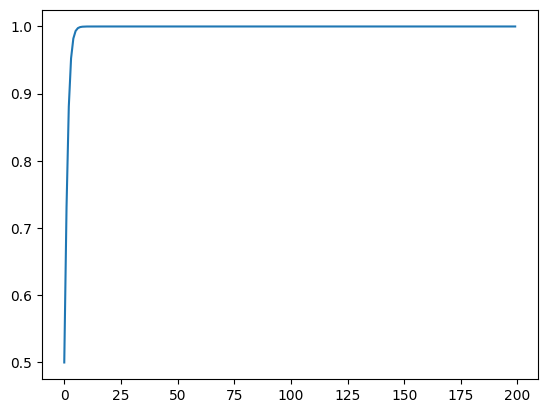

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))
x=np.arange(200)
y=sigmoid(x)
plt.plot(x,y)

In [4]:
import findspark
findspark.init()
findspark.find()


from pyspark.sql import SparkSession
from pyspark.sql import DataFrame
import pyspark.sql.functions as F
from pyspark.sql.types import StructType, StructField, StringType, TimestampType,IntegerType
from datetime import datetime, timezone, timedelta


spark=SparkSession.builder.appName("Testing PySpark Example").getOrCreate()

schema = StructType([
    StructField("dropoff_zip", StringType(), True),
    StructField("timestamp", StringType(), True)
])

data = [
    ("10001", "2024-09-07 14:25:00"),
    ("10001", "2024-09-07 14:32:00"),
    ("10001", "2024-09-07 14:33:00"),
    ("10002", "2024-08-01 14:45:00"),
    ("10003", "2024-08-01 15:00:00"),
    ("10004", "2024-09-14 15:15:00"),
    ("10004", "2024-09-14 15:20:00")
]
df = spark.createDataFrame(data, schema=schema)
df = df.withColumn("timestamp", F.to_timestamp("timestamp", 'yyyy-MM-dd HH:mm:ss'))
df.show()

+-----------+-------------------+
|dropoff_zip|          timestamp|
+-----------+-------------------+
|      10001|2024-09-07 14:25:00|
|      10001|2024-09-07 14:32:00|
|      10001|2024-09-07 14:33:00|
|      10002|2024-08-01 14:45:00|
|      10003|2024-08-01 15:00:00|
|      10004|2024-09-14 15:15:00|
|      10004|2024-09-14 15:20:00|
+-----------+-------------------+



In [5]:
aggregated_df = (df
    .groupBy("dropoff_zip", F.window("timestamp", "30 minutes"))
    .agg(F.count("*").alias("count_trips_window_30m_dropoff_zip"))
    .select(
        "dropoff_zip",
        "window.start",
        "window.end",
        "count_trips_window_30m_dropoff_zip"
    ))
aggregated_df.orderBy('dropoff_zip','start').show()

+-----------+-------------------+-------------------+----------------------------------+
|dropoff_zip|              start|                end|count_trips_window_30m_dropoff_zip|
+-----------+-------------------+-------------------+----------------------------------+
|      10001|2024-09-07 14:00:00|2024-09-07 14:30:00|                                 1|
|      10001|2024-09-07 14:30:00|2024-09-07 15:00:00|                                 2|
|      10002|2024-08-01 14:30:00|2024-08-01 15:00:00|                                 1|
|      10003|2024-08-01 15:00:00|2024-08-01 15:30:00|                                 1|
|      10004|2024-09-14 15:00:00|2024-09-14 15:30:00|                                 2|
+-----------+-------------------+-------------------+----------------------------------+



In [6]:
@F.udf(returnType=StringType())
def _partition_id(dt):
    # datetime -> "YYYY-MM"
    return f"{dt.year:04d}-{dt.month:02d}"

@F.udf(returnType=IntegerType())
def _is_weekend(dt):
    return int(dt.astimezone(timezone(timedelta(hours=8))).weekday() >= 5)  # 5 = Saturday, 6 = Sunday

adf=aggregated_df.select(
            F.col("dropoff_zip").alias("zip"),
            F.unix_timestamp(F.col("end"))
            .alias('timestamp_column')
            .cast(TimestampType()),
            _partition_id(F.to_timestamp(F.col("end"))).alias("yyyy_mm"),
            F.col("count_trips_window_30m_dropoff_zip").cast(IntegerType()),
            _is_weekend(F.col("end")).alias("dropoff_is_weekend"),
        )
adf.show()

+-----+-------------------+-------+----------------------------------+------------------+
|  zip|   timestamp_column|yyyy_mm|count_trips_window_30m_dropoff_zip|dropoff_is_weekend|
+-----+-------------------+-------+----------------------------------+------------------+
|10001|2024-09-07 14:30:00|2024-09|                                 1|                 1|
|10001|2024-09-07 15:00:00|2024-09|                                 2|                 1|
|10002|2024-08-01 15:00:00|2024-08|                                 1|                 0|
|10003|2024-08-01 15:30:00|2024-08|                                 1|                 0|
|10004|2024-09-14 15:30:00|2024-09|                                 2|                 1|
+-----+-------------------+-------+----------------------------------+------------------+



In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
pdf=df.toPandas()
pdf

,dropoff_zip,timestamp
0,10001,2024-09-07 14:25:00
1,10001,2024-09-07 14:32:00
2,10001,2024-09-07 14:33:00
3,10002,2024-08-01 14:45:00
4,10003,2024-08-01 15:00:00
5,10004,2024-09-14 15:15:00
6,10004,2024-09-14 15:20:00


<Axes: xlabel='dropoff_zip', ylabel='Count'>

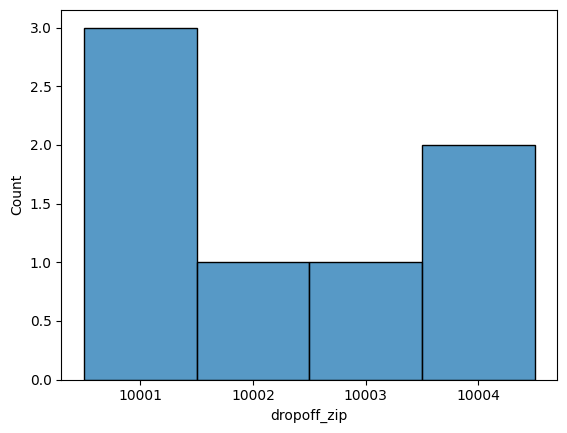

In [60]:
sns.histplot(pdf['dropoff_zip'])

In [1]:
import pandas as pd

data = {'depth': ['Alice', 'Bob', 'Charlie'], 'Accuracy': [25, 30, 35], 'Balanced_Accuracy': [50000, 60000, 55000]}
df = pd.DataFrame(data)

# 获取列名
columns = df.columns

# 打印列名
print(columns)


Index(['Name', 'Age', 'Salary'], dtype='object')


In [17]:
from typing import Any, Callable, Iterator, Optional, Union
import pyspark.pandas as ps
from pyspark.sql import DataFrame as SparkDataFrame
from pyspark.sql import SparkSession

def save_df_to_delta(df: Union[ps.DataFrame, pd.DataFrame, SparkDataFrame], table: str):  # pragma: no cover
    spark = SparkSession.builder.master("local").getOrCreate()
    if isinstance(df, ps.DataFrame):
        sdf = df.to_spark()
    elif isinstance(df, pd.DataFrame):
        sdf = spark.createDataFrame(df)
    elif isinstance(df, SparkDataFrame):
        sdf = df

        sdf.write.format("delta").mode("overwrite").option("overwriteSchema", "true").saveAsTable(table)


In [18]:
save_df_to_delta(df, "ma_auto_subchannel_seperation_metrics")

In [1]:
import pandas as pd

# 假设这是您提供的字典
data = {
    "Accuracy": 0.9940223228879652,
    "Balanced_Accuracy": 0.8192985462587007,
    "F1": 0.9940223228879652,
    "F1_HFS": 0.9973591867742285,
    "F1_MM": 0.6148867313915858,
    "F1_WS": 0.9738717339667459,
    "Precision": 0.9940223228879652,
    "Precision_HFS": 0.9953308142193554,
    "Precision_MM": 0.8260869565217391,
    "Precision_WS": 0.9789875835721108,
    "Recall": 0.9940223228879652,
    "Recall_HFS": 0.99939584340261,
    "Recall_MM": 0.4896907216494845,
    "Recall_WS": 0.9688090737240076
}

# 提取数据
rows = ["HFS", "WS", "MM", "Total"]
columns = ["Accuracy", "Precision", "Recall", "F1"]

# 创建 DataFrame
df = pd.DataFrame(index=rows, columns=columns)

# 填充数据
for class_label in ["HFS", "WS", "MM"]:
    for metric in ["Precision", "Recall", "F1"]:
        df.at[class_label, metric] = data[f"{metric}_{class_label}"]
        
# Total 行
for metric in columns:
    df.at["Total", metric] = data.get(metric, None)

print(df)

       Accuracy Precision    Recall        F1
HFS         NaN  0.995331  0.999396  0.997359
WS          NaN  0.978988  0.968809  0.973872
MM          NaN  0.826087  0.489691  0.614887
Total  0.994022  0.994022  0.994022  0.994022


In [ ]:
import pytest

@pytest.fixture
def test_data():
    data = {
    "Accuracy": 0.9940223228879652,
    "Balanced_Accuracy": 0.8192985462587007,
    "F1": 0.9940223228879652,
    "F1_HFS": 0.9973591867742285,
    "F1_MM": 0.6148867313915858,
    "F1_WS": 0.9738717339667459,
    "Precision": 0.9940223228879652,
    "Precision_HFS": 0.9953308142193554,
    "Precision_MM": 0.8260869565217391,
    "Precision_WS": 0.9789875835721108,
    "Recall": 0.9940223228879652,
    "Recall_HFS": 0.99939584340261,
    "Recall_MM": 0.4896907216494845,
    "Recall_WS": 0.9688090737240076
}
    return data


def test_spark_dataframe(test_data):
    # 初始化 SparkSession
    spark = SparkSession.builder \
                        .appName("Pytest-Spark-Example") \
                        .master("local[1]") \
                        .getOrCreate()
    
    # 用测试数据创建 DataFrame
    df = spark.createDataFrame(test_data)
    
    # 展示 DataFrame 内容
    df.show()
    
    # 检验 DataFrame 的行数是否正确（14 条数据）
    assert df.count() == 14
    
    # 检查某个特定值是否存在（例如 Accuracy 的值是否正确）
    accuracy_row = df.filter(df["Metric"] == "Accuracy").collect()
    assert len(accuracy_row) == 1
    assert accuracy_row[0]["Value"] == 0.9940223228879652

# pytest test_your_file.py

In [42]:
import findspark
findspark.init()
findspark.find()


from pyspark.sql import SparkSession
from pyspark.sql import DataFrame
import pyspark.sql.functions as f


spark = SparkSession.builder \
    .master("local") \
    .config("spark.jars.packages","io.delta:delta-core_2.12:2.1.0") \
    .config("spark.sql.extensions", "io.delta.sql.DeltaSparkSessionExtension") \
    .config("spark.sql.catalog.spark_catalog", "org.apache.spark.sql.delta.catalog.DeltaCatalog") \
    .getOrCreate()

df=spark.read.csv("top_ngrams_per_author.csv",header=True)
df=df.select("author").distinct()
lp=df.alias("lp").filter(f.col("lp.author")=="getgads")
df.show()
    

+-------------------+
|             author|
+-------------------+
|   CarlosCastillo10|
| Ranadeep Mukherjee|
|        deepscanbot|
|         Eiji Akagi|
|            tarlepp|
|      Milad Norouzi|
|         Jerry Hong|
|        ElanurGuduk|
|       jbrockmendel|
|            akeahey|
|        latent-info|
|       Xander Flood|
|             PushKK|
|  Thomas Huybrechts|
|    Rohit Garudadri|
|            getgads|
|            ftc9881|
|               Dr2n|
|       Honza Kalfus|
|sourceconnect-tests|
+-------------------+
only showing top 20 rows



In [43]:
import pyspark.sql.functions as f
df1 = spark.createDataFrame([('2015-04-08',)], ['dt'])
df1.select(f.date_format('dt', 'MM/dd/yyy').alias('date')).show()

+----------+
|      date|
+----------+
|04/08/2015|
+----------+



In [14]:
import pandas as pd

# 定义两个 DataFrame
data1 = {'id': [1, 2, 2, 3], 'name': ['Alice', 'Bob', 'Bob', 'Charlie']}
data2 = {'id': [2, 3], 'name': ['Bob', 'Charlie']}

df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)

# 使用左连接找到仅在 df1 中出现但不在 df2 中的行（相当于 exceptAll）
result_exceptAll = df1.merge(df2, how='left', on=['id', 'name'], indicator=True).query('_merge=="left_only"')
result_exceptAll

,id,name,_merge
0,1,Alice,left_only
